In [1]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.6 MB/s eta 0:00:00


In [2]:
#general 
import os, sys
import glob
from tqdm import tqdm

#chart
import matplotlib.pyplot as plt
import seaborn as sns

#dataframe, calculation
import pandas as pd 
import numpy as np 

#Model
import lightgbm as lgb


#learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import svm

#image analysis
import cv2
import pydicom

#encoding category variable
## preprocessing 
from sklearn.preprocessing import LabelEncoder

# 0. Mount Data and set base directory 

In [3]:
from google.colab import drive
drive.mount("/content/drive")

path_data = "/content/drive/MyDrive/kaggle/kaggle_rsna2022"
os.chdir(path_data)

Mounted at /content/drive


# 01. EDA
- [ ] 01-01. load dataframes of train and 

- [ ] 01-02. check columns and their meanings

- [ ] 01-03. check distrubition of objective between train and eval



In [4]:
df_train = pd.read_csv("input/rsna-breast-cancer-detection/train.csv")
df_test = pd.read_csv('input/rsna-breast-cancer-detection/test.csv')
df_test

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [5]:
if not os.path.isfile("df_train.pkl"):
  df_train = pd.read_csv("input/rsna-breast-cancer-detection/train.csv")

  # Get image path
  # Example path: 'input/rsna-breast-cancer-detection/train_images/10706/763186195.dcm'
  base_path = "input/rsna-breast-cancer-detection/train_images/"
  all_paths = []
  for k in tqdm(range(len(df_train))):
      row = df_train.iloc[k, :]
      all_paths.append(base_path + str(row.patient_id) + "/" + str(row.image_id) + ".dcm")
      
  df_train["path"] = all_paths
  df_train.to_pickle("df_train.pkl")
else:
  df_train = pd.read_pickle("df_train.pkl")

In [6]:
df_train

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,input/rsna-breast-cancer-detection/train_image...
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,input/rsna-breast-cancer-detection/train_image...
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,input/rsna-breast-cancer-detection/train_image...
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,input/rsna-breast-cancer-detection/train_image...
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,input/rsna-breast-cancer-detection/train_image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,input/rsna-breast-cancer-detection/train_image...
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,input/rsna-breast-cancer-detection/train_image...
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,input/rsna-breast-cancer-detection/train_image...
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,input/rsna-breast-cancer-detection/train_image...


## Findings
- the number of rows are corresponding to the number of images
- multiple images are taken an each patient 
- a certain amount of null data exiests  

## Questiones
Q0. 
- [ ] what shape do train and test has?
-> Check their shape

Q1.
- [ ] how many images are taken on each patient?  
-> Check them. and also other columns too using descrive method

Q2.
- [ ] how many null values in a row on train and test data set? 
-> count null numbers on each columns

In [7]:
print(f"shape in train and test:{df_train.shape}, {df_test.shape}")

shape in train and test:(54706, 15), (4, 9)


- test images only has 4 images 
  - [x] check if they are corresponding to the images in test_images

In [8]:
num_train_patients = len(os.listdir("input/rsna-breast-cancer-detection/train_images"))
num_test_patients = len(os.listdir("input/rsna-breast-cancer-detection/test_images"))


In [9]:
#os.listdir("input/rsna-breast-cancer-detection/test_images/10008")



In [ ]:
num_train_images = len(glob.glob("input/rsna-breast-cancer-detection/train_images/*/*.dcm"))
num_test_images = len(glob.glob("input/rsna-breast-cancer-detection/test_images/*/*.dcm"))

print(f"the number of files in train and test images directory:\
  {num_train_images}, {num_test_images}"
  )

the number of files in train and test images directory:  54706, 4


## findings
### the number of images in train/test dataset
- train_images: 
- test_images: 

-> the number of image files in train/test-images directory match to the one listed in data set csv


## findings


In [ ]:
# count the number of null in both dataset 
print(f"train: {df_train.isnull().sum()}")

print("\n")
print(f"test: {df_test.isnull().sum()}")



train: site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
path                           0
dtype: int64


test: site_id          0
patient_id       0
image_id         0
laterality       0
view             0
age              0
implant          0
machine_id       0
prediction_id    0
dtype: int64


## Findings
- age, BIRDS, density has null data 
  - [ ] check what they meanns and also other columns too

In [ ]:
print("how many images taken on every patient \n")
print(df_train.groupby("patient_id")["image_id"].count().reset_index().describe()["image_id"])

print("\n")
print("how many images taken on every site \n")
print(df_train.groupby("site_id")["image_id"].count().reset_index().describe()["image_id"])

how many images taken on every patient 

count    11913.000000
mean         4.592126
std          1.133216
min          4.000000
25%          4.000000
50%          4.000000
75%          5.000000
max         14.000000
Name: image_id, dtype: float64


how many images taken on every site 

count        2.000000
mean     27353.000000
std       3063.186576
min      25187.000000
25%      26270.000000
50%      27353.000000
75%      28436.000000
max      29519.000000
Name: image_id, dtype: float64


## Findings 
- most of the patients have 4 images 
  - maximum: 14
  - std: 1.1

- 2site only
  - one: 25187
  - the other: 29519
  

## columns only exists in train data

In [ ]:
set(df_train.columns) - set(df_test.columns)

{'BIRADS',
 'biopsy',
 'cancer',
 'density',
 'difficult_negative_case',
 'invasive',
 'path'}

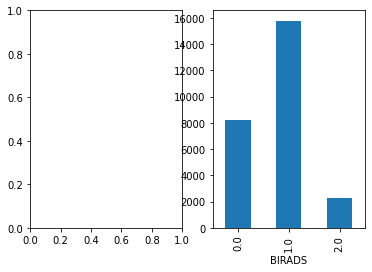

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0] = df_train.groupby(["BIRADS"])["patient_id"].count().plot.bar()
axes[1] = df_train.groupby(["BIRADS"])["image_id"].count().plot.bar()
plt.show()

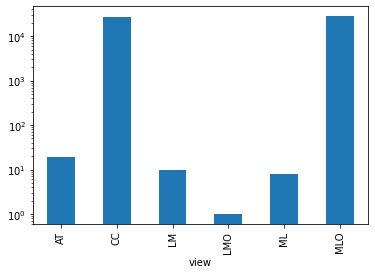

In [ ]:
df_train.groupby("view")["view"].count().plot.bar(logy=True)

In [ ]:
sample_size = 5

class showing_images_in_specific_feature():
  
  def __init__(self, col, sample_size=5):
    self.col = col
    self.sample_size = sample_size

  def showing_images(self):
    
    _df = df_train.loc((df_train[self.col]df_train["cancer"]==1].sample(self.sample_size, random_state=1234)



SyntaxError: ignored

In [ ]:
_df

In [ ]:
for path in _df["path"]:
  img = pydicom.dcmread(path).pixel_array
  plt.imshow(img)